# Alucar - Analisando as vendas

## Gráfico de vendas, Aumento e Aceleração

In [1]:
import os
import pandas as pd

In [2]:
alucar = pd.read_csv(os.path.join('material-curso', 'alucar.csv'))
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
# (Linhas, Colunas): São dois anos de dados
alucar.shape

(24, 2)

In [4]:
# Quantidades de nulos
alucar.isna().sum().sum()

0

In [5]:
# Tipo dos dados
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
# Convertendo de object para datetime
alucar['mes'] = alucar['mes'].apply(pd.to_datetime)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
!pip install seaborn==0.9.0 -q
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

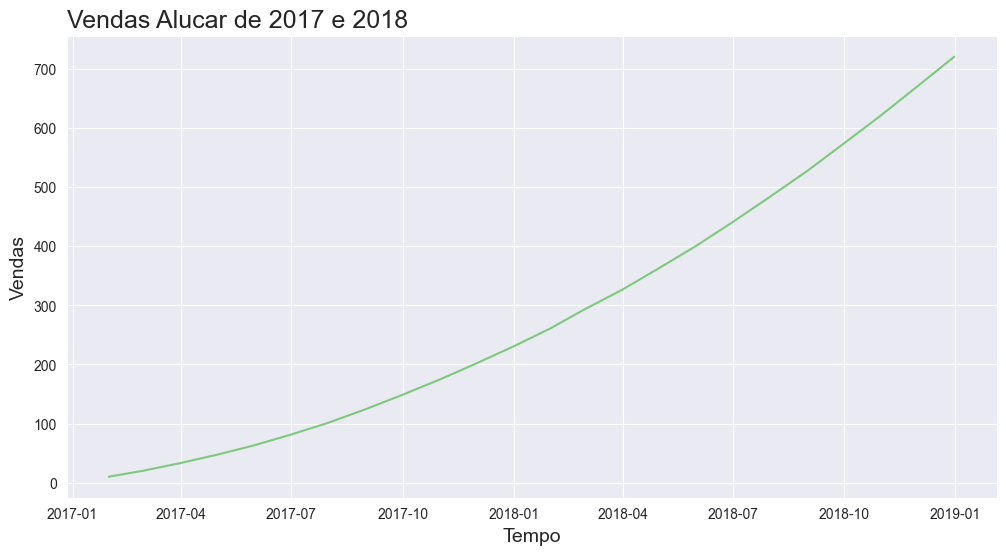

In [8]:
# Gráfico feio, nunca mais: http://urbaninstitute.github.io/graphics-styleguide/
def plotar(title, xlabel, ylabel, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

plotar('Vendas Alucar de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', alucar)

In [9]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


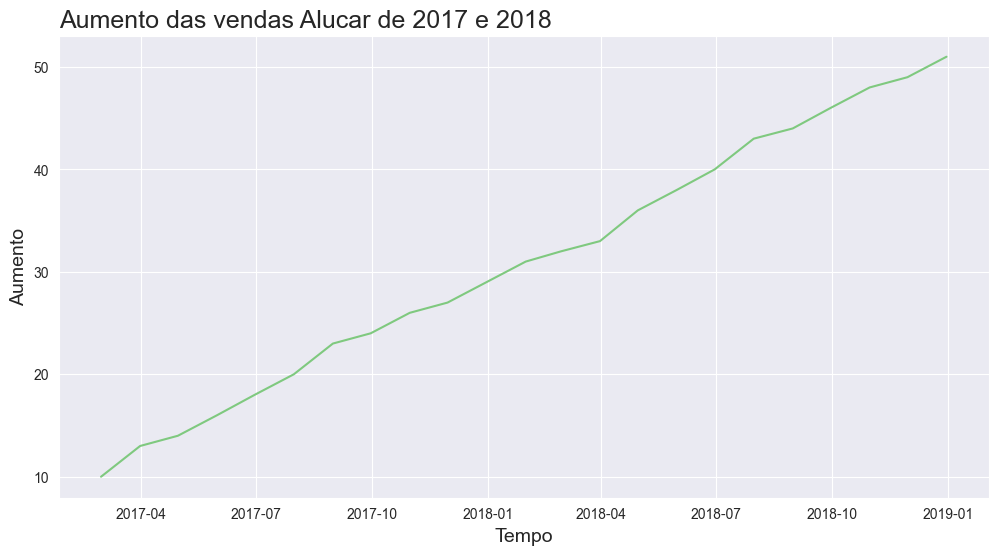

In [10]:
plotar('Aumento das vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [11]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


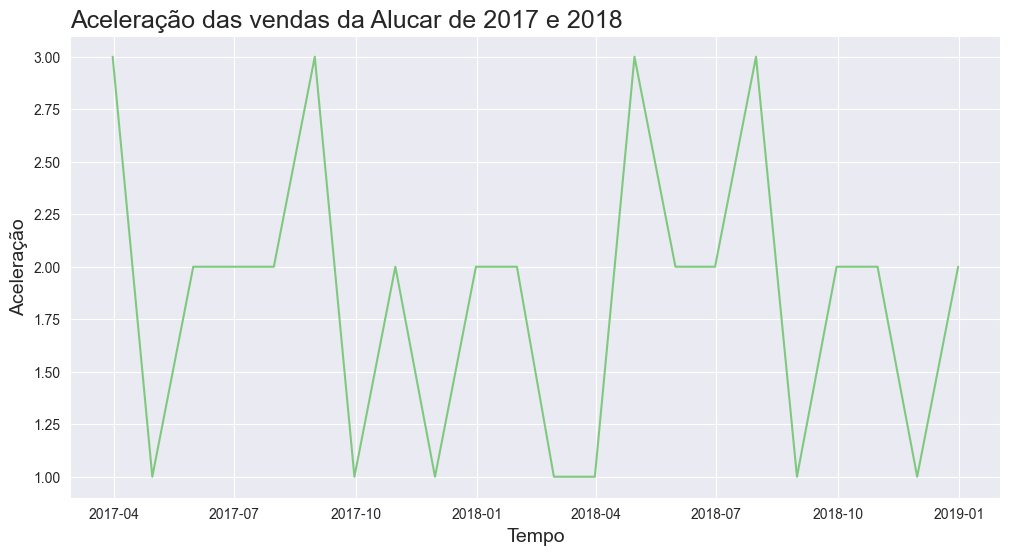

In [12]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

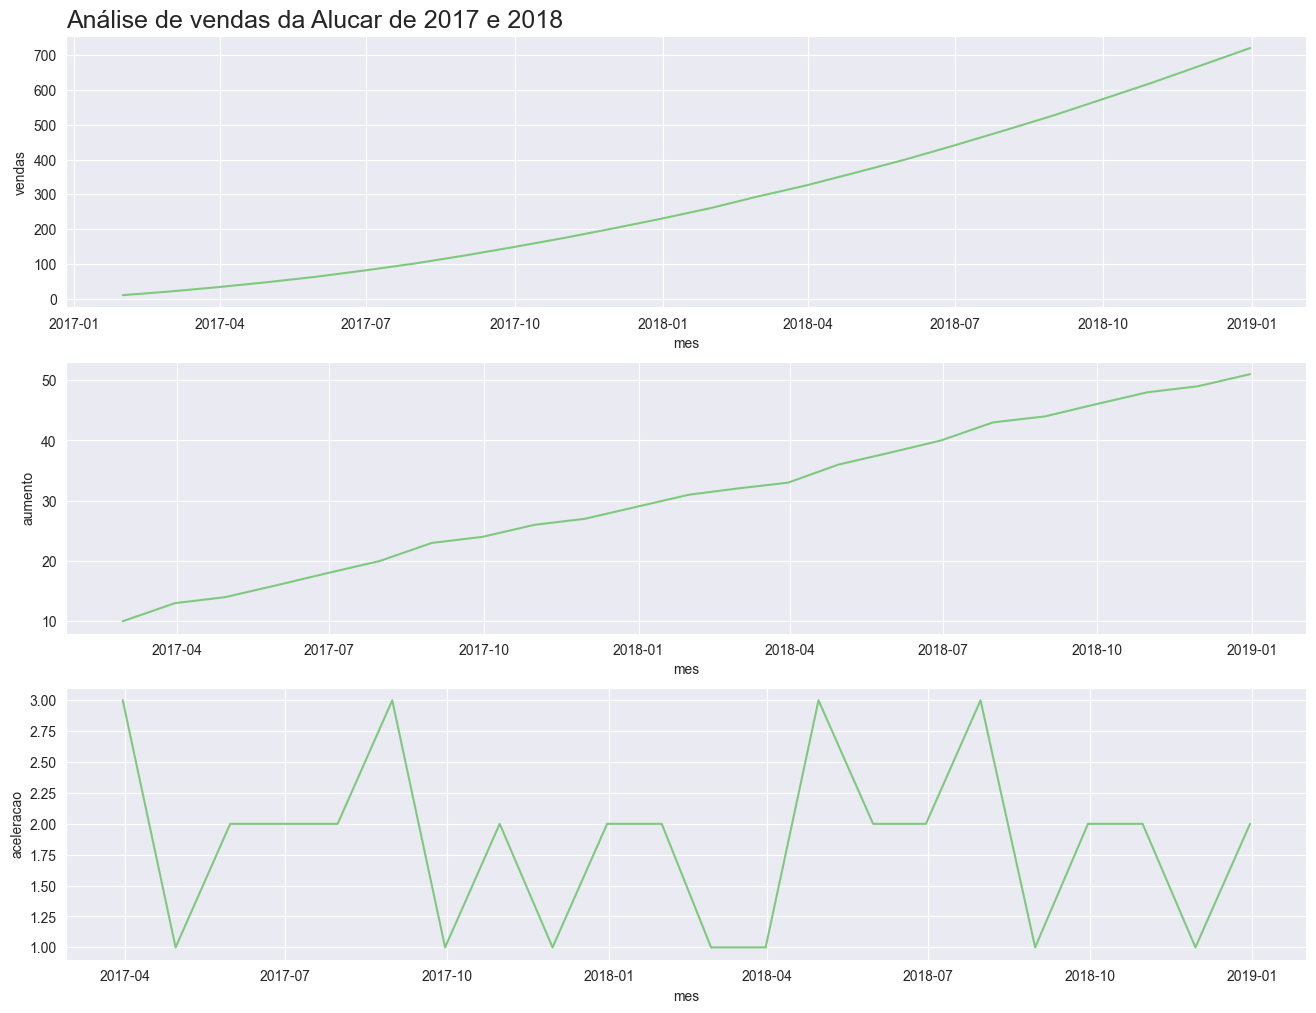

In [13]:
def plot_comparacao(title, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1) # rows, columns, index
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)

plot_comparacao('Análise de vendas da Alucar de 2017 e 2018', 'mes', 'vendas', 'aumento', 'aceleracao', alucar)

## Autocorrelação

In [14]:
from pandas.plotting import autocorrelation_plot

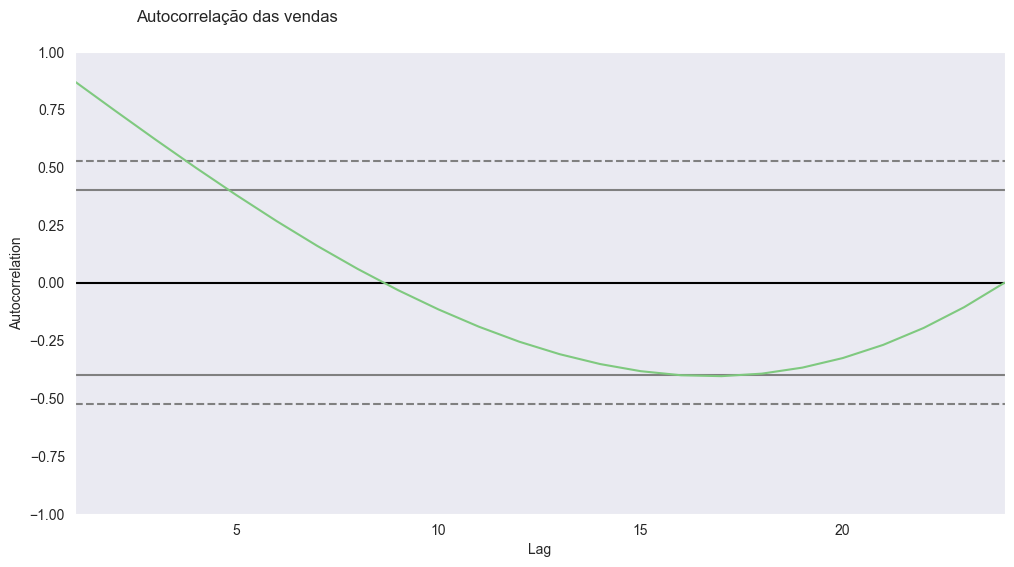

In [15]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação das vendas', x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

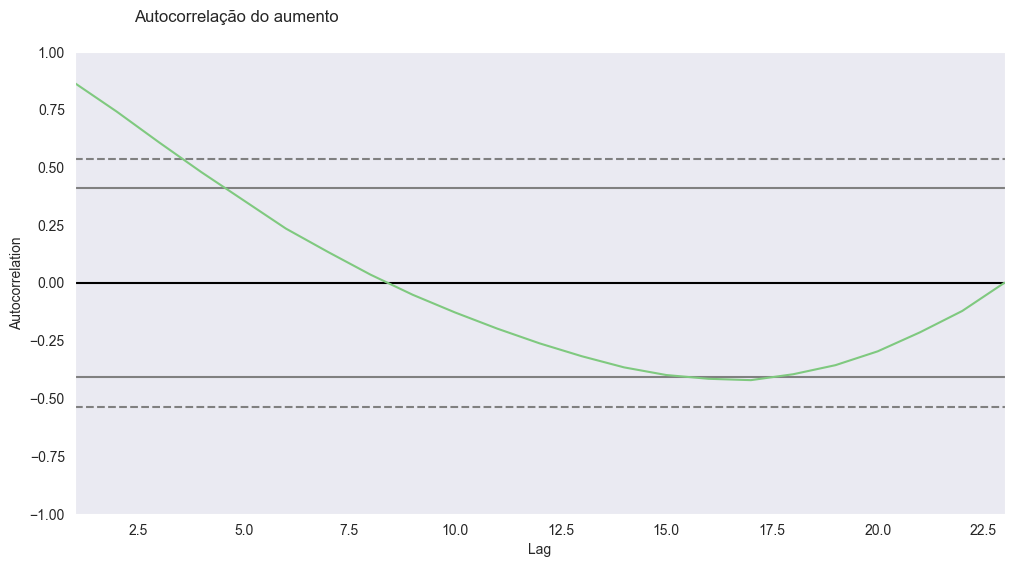

In [16]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação do aumento', x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

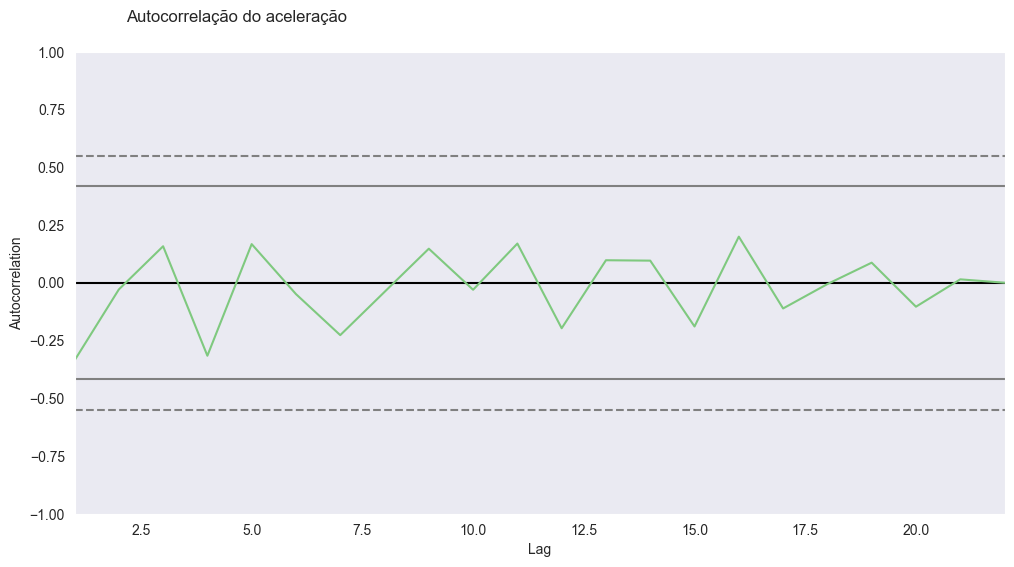

In [17]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação do aceleração', x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Importância da decomposição e sazonalidade

## Alucar - analisando assinantes da newsletter

In [18]:
assinantes = pd.read_csv(os.path.join('material-curso', 'newsletter_alucar.csv'))
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [19]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [20]:
assinantes.shape, assinantes.isna().sum().sum()

((24, 2), 0)

In [21]:
assinantes['mes'] = assinantes['mes'].apply(pd.to_datetime)

In [22]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [23]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


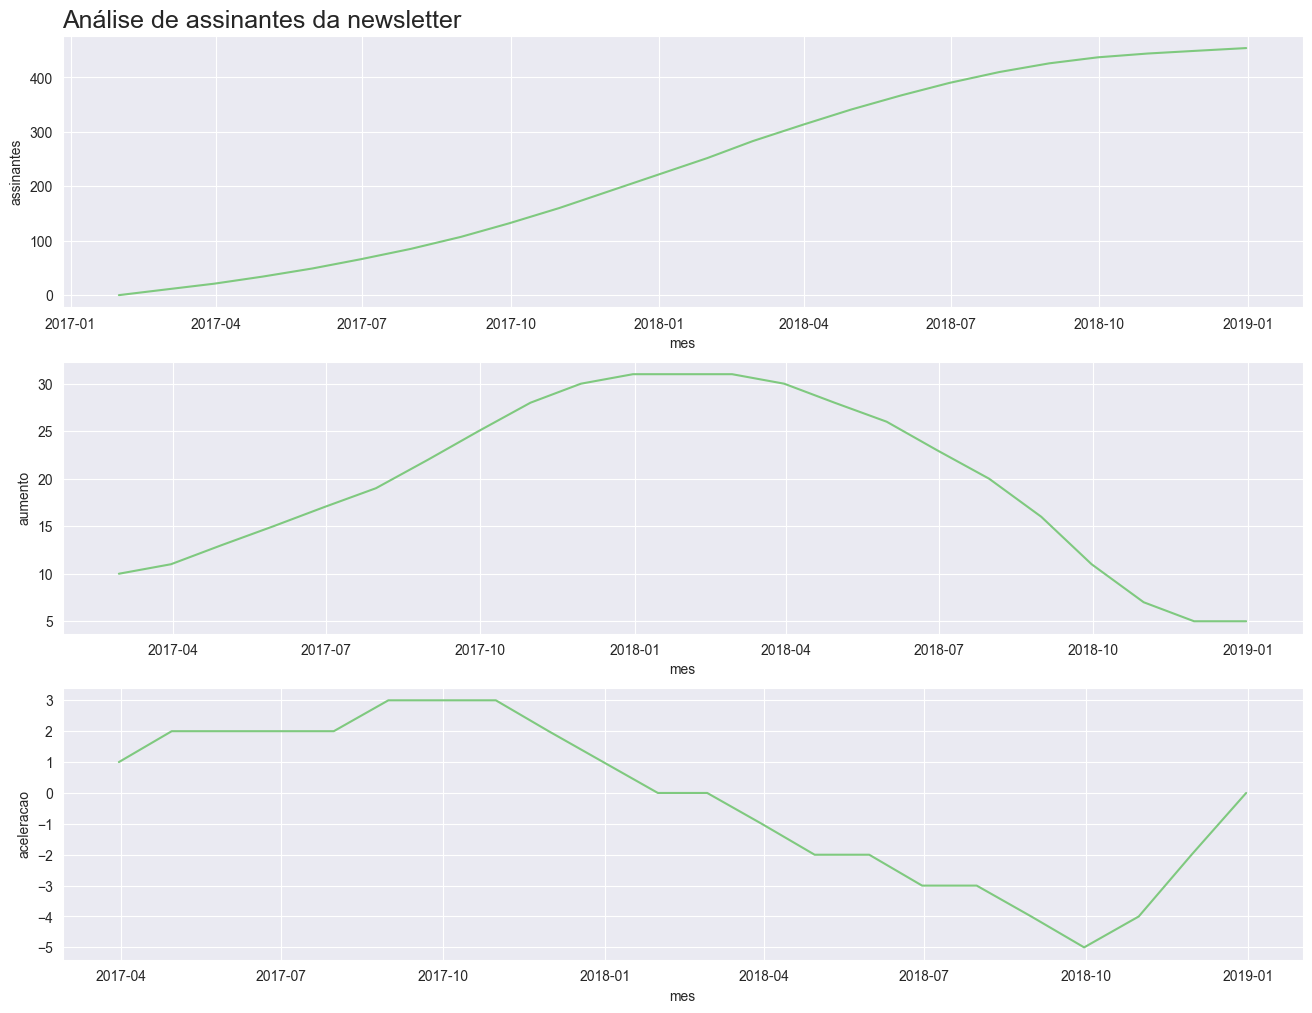

In [24]:
plot_comparacao('Análise de assinantes da newsletter', 'mes', 'assinantes', 'aumento', 'aceleracao', assinantes)

# Análise das vendas: Chocolura

In [25]:
chocolura = pd.read_csv(os.path.join('material-curso', 'chocolura.csv'))
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [26]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [27]:
chocolura['mes'] = chocolura['mes'].apply(pd.to_datetime)
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [28]:
chocolura.shape, chocolura.isna().sum().sum()

((24, 2), 0)

In [29]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


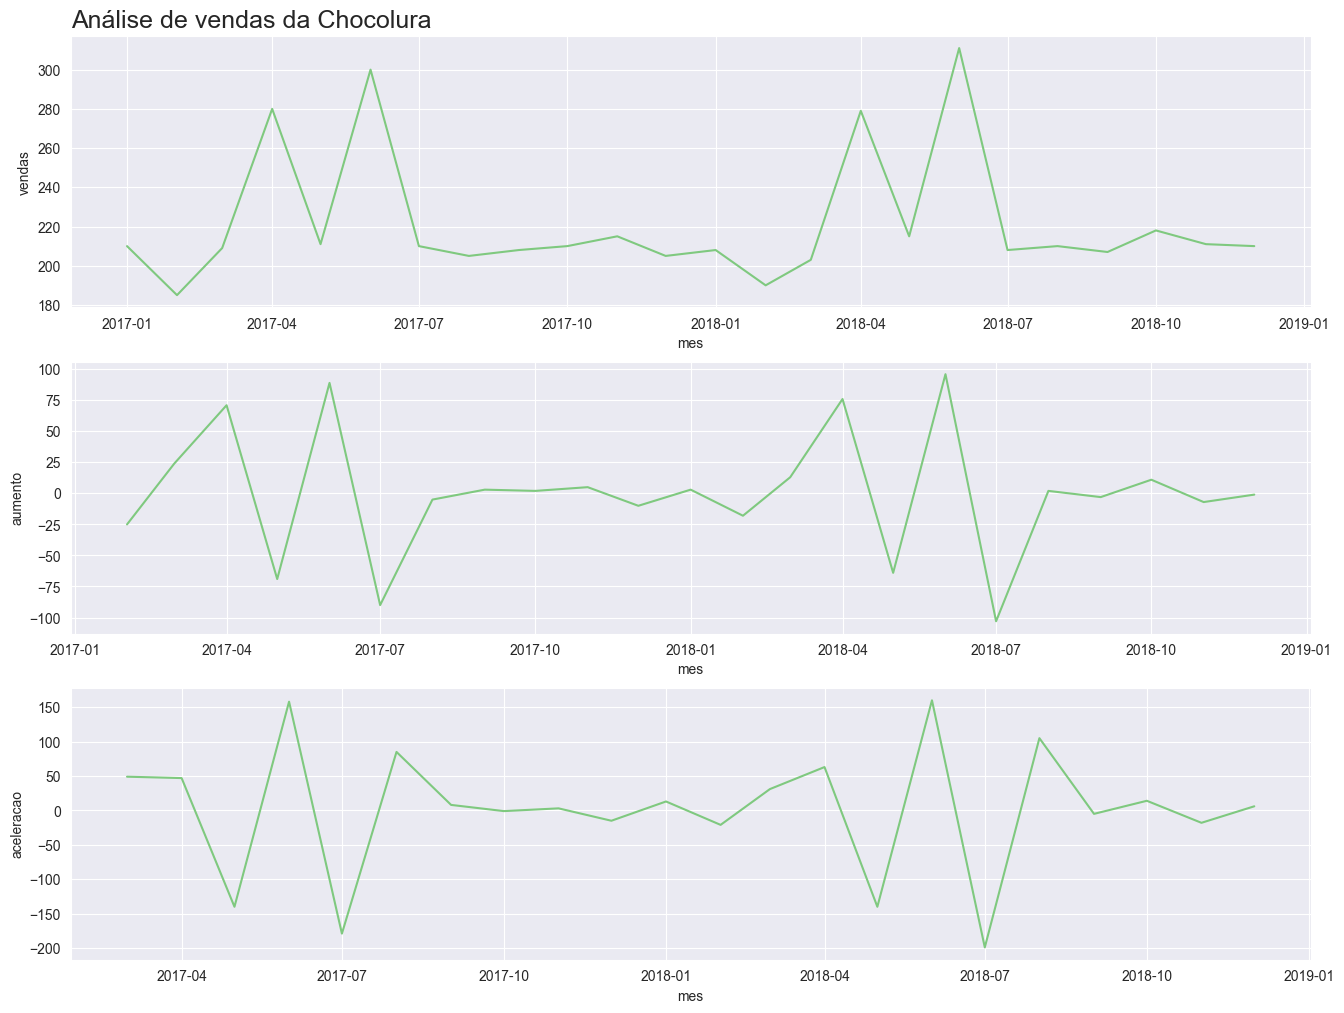

In [30]:
plot_comparacao('Análise de vendas da Chocolura', 'mes', 'vendas', 'aumento', 'aceleracao', chocolura)

## Chocolura - vendas diárias

In [31]:
vendas_por_dia = pd.read_csv(os.path.join('material-curso', 'vendas_por_dia.csv'))
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [32]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [33]:
vendas_por_dia['dia'] = vendas_por_dia['dia'].apply(pd.to_datetime)
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [34]:
vendas_por_dia.shape, vendas_por_dia.isna().sum().sum()

((61, 2), 0)

In [35]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


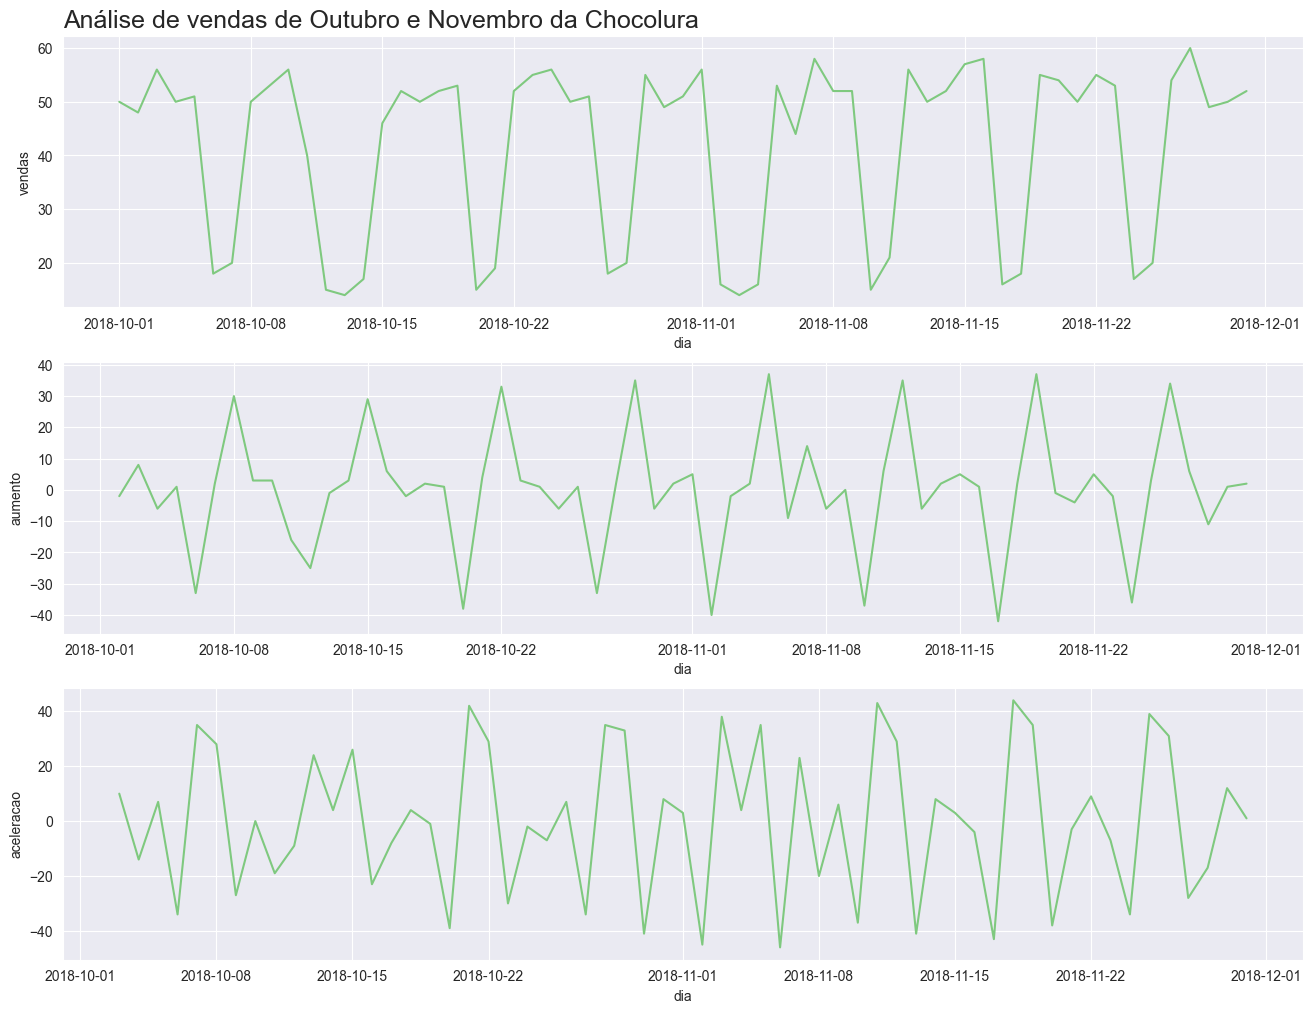

In [36]:
plot_comparacao('Análise de vendas de Outubro e Novembro da Chocolura', 'dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia)

## Analisando a sazonalidade

In [37]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [38]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [39]:
dias_traduzidos = {
    'Monday': 'segunda',
    'Tuesday': 'terça',
    'Wednesday': 'quarta',
    'Thursday': 'quinta',
    'Friday': 'sexta',
    'Saturday': 'sabado',
    'Sunday': 'domingo'
}

In [40]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta


## Agrupando vendas por dia

In [41]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terça,52.0,-1.0,-34.0


## Autocorrelação das vendas diárias

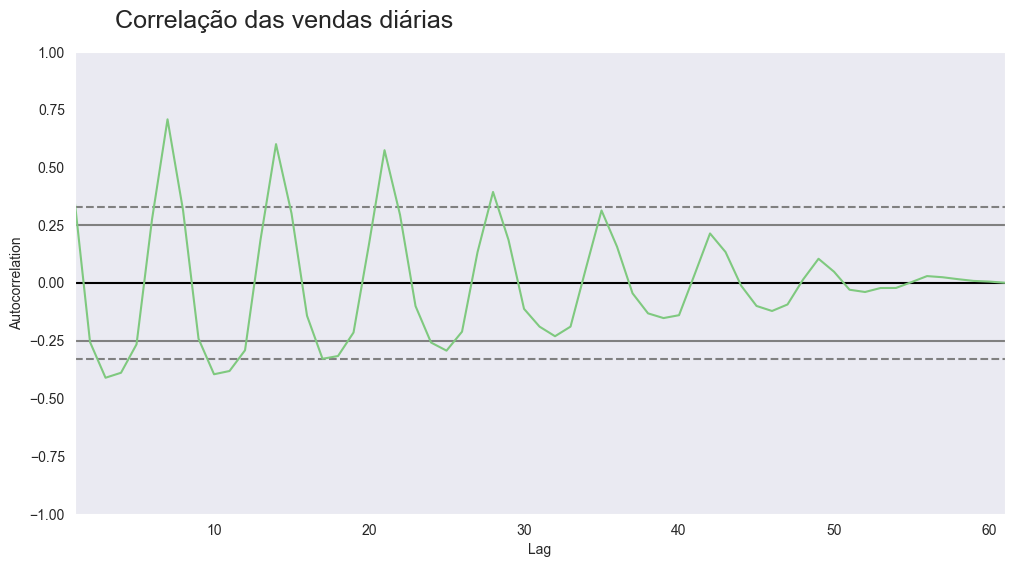

In [42]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

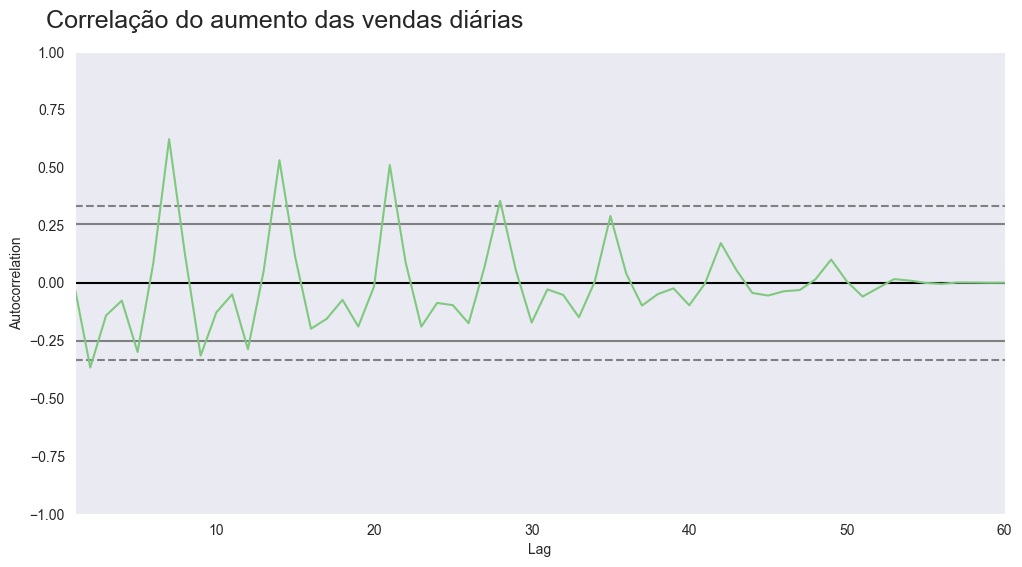

In [43]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

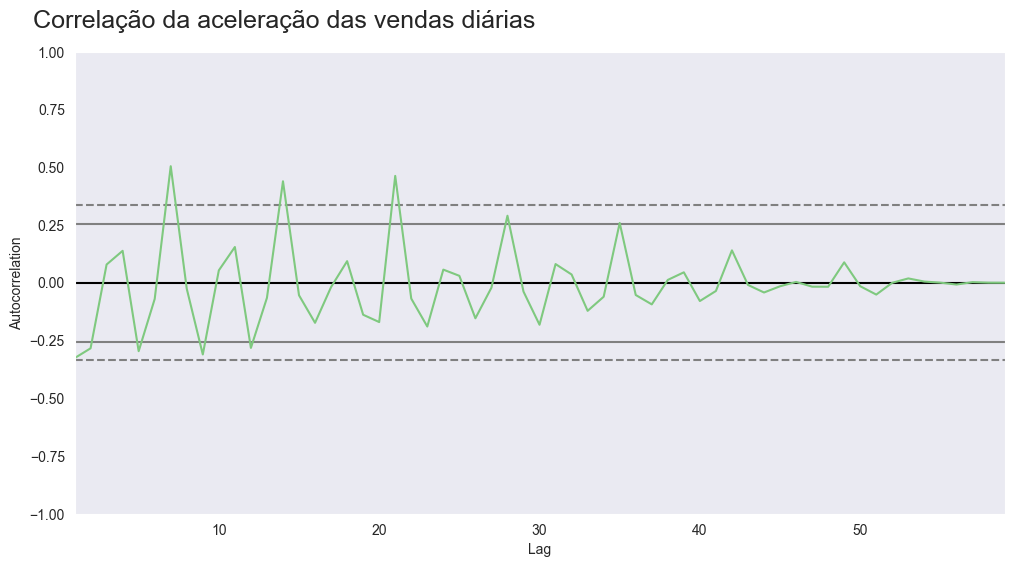

In [44]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax